In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

    # Normalize the input data
    # specify the layers of cnn including convolution layers, pooling layers and fully connected layers
    # choose activation functions for each layer except the ouput layer
    # initialize the weights and biases of network
    # perform convolution operations using filters/kernals input data
    # calculate the loss between predicted output and actual labels
    # ACTIVATION FUNCTION]
        A = o-(z)
    #POOLING
        Pijk=MAXu,v A(i-1)Sp + u ,(j-1)Sp+V,K

    # LOSS FUNCTION
        L(Y,Y^)=SUMM(I=1 TO C)Yi.log(Yi^)

In [7]:
import zipfile
zip_file_path = r"C:\Users\OneDrive\Documents\archive1.zip"
extract_dir = r"C:\Users\OneDrive\Documents"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)       

In [14]:
import pandas as pd
import os

# Define the directory path
directory_path = r"D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train"

# Load data
image_paths = []
labels = []

# Iterate over each folder
for folder in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder)
    if os.path.isdir(folder_path):
        # Get the number of images in the folder
        num_images = len(os.listdir(folder_path))
        # Append the image paths and labels
        image_paths.extend([os.path.join(folder_path, f) for f in os.listdir(folder_path)])
        labels.extend([folder] * num_images)

# Create a DataFrame
df = pd.DataFrame({'image_path': image_paths, 'labels': labels})

# Drop missing values
data = df.dropna()

# Reset index
data.reset_index(drop=True, inplace=True)

data

,image_path,labels
0,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...,ulyses
1,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...,ulyses
2,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...,ulyses
3,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...,ulyses
4,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...,ulyses
...,...,...
427,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...,zebra long wing
428,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...,zebra long wing
429,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...,zebra long wing
430,D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...,zebra long wing


In [15]:
print(df.head())
print("Number of rows in df:", len(df))


                                          image_path  labels
0  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
1  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
2  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
3  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
4  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
Number of rows in df: 432


In [16]:
print(df['labels'].head())
print("Number of rows in labels:", len(df['labels']))


0    ulyses
1    ulyses
2    ulyses
3    ulyses
4    ulyses
Name: labels, dtype: object
Number of rows in labels: 432


In [36]:
for i in df:
    print(i," has these unique values:",df[i].unique())

image_path  has these unique values: ['D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\000.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\001.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\002.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\003.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\004.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\005.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\006.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\007.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\008.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\009.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\010.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\011.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\012.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\013.jpg'
 'D:\\SEM 6\\ML LAB\\PROBLEMS\\5. CNN\\Train\\ulyses\\014.jpg'
 'D:\\SEM 6\\ML LA

## Examining the Class Distribution in the Dataset:

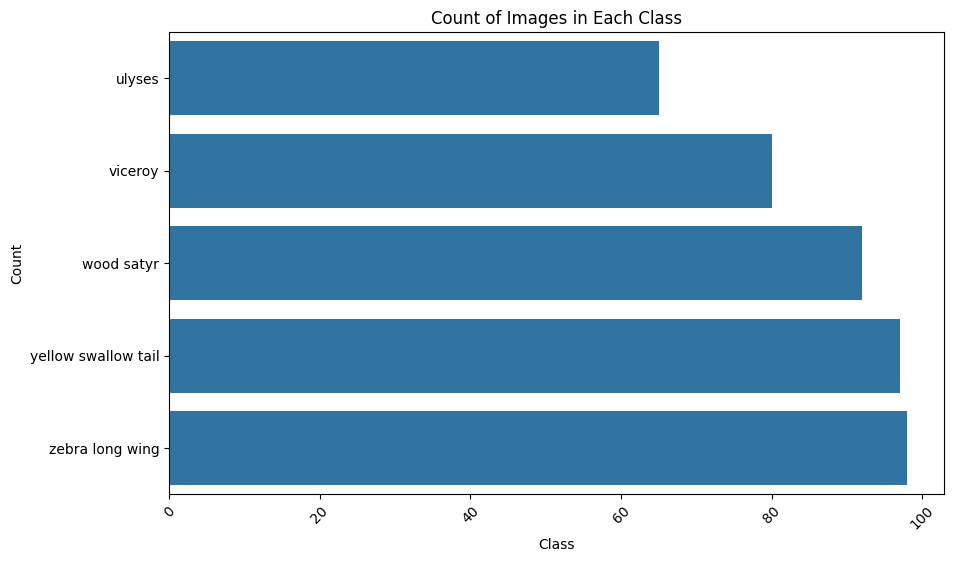

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of images in each class
plt.figure(figsize=(10, 6))
sns.countplot(df['labels'])
plt.title('Count of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
df.dtypes

image_path    object
labels        object
dtype: object

In [40]:
df.isnull().sum()

image_path    0
labels        0
dtype: int64

## Calculating and Visualizing the Average Pixel Intensity Across All Images:

In [43]:
import numpy as np

# Calculate average pixel intensity across all images
avg_pixel_intensity = np.mean([np.mean(plt.imread(img_path)) for img_path in data['image_path']])

print("Average Pixel Intensity:", avg_pixel_intensity)


Average Pixel Intensity: 102.28744459581284


## Visualizing the Color Distribution in Images:

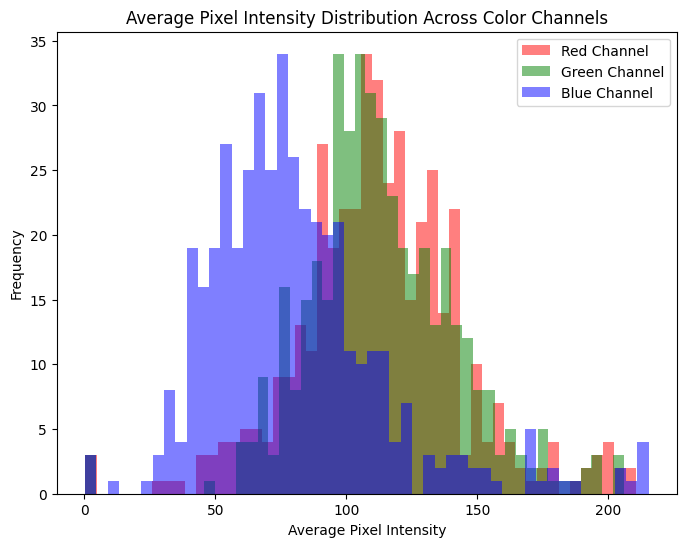

In [46]:
import numpy as np

# Calculate average pixel values across color channels for each image
avg_pixel_values = [np.mean(plt.imread(img_path), axis=(0, 1)) for img_path in data['image_path']]

# Convert the list of arrays to a numpy array
avg_pixel_values = np.array(avg_pixel_values)

# Plot histogram of average pixel values
plt.figure(figsize=(8, 6))
plt.hist(avg_pixel_values[:, 0], bins=50, alpha=0.5, color='red', label='Red Channel')
plt.hist(avg_pixel_values[:, 1], bins=50, alpha=0.5, color='green', label='Green Channel')
plt.hist(avg_pixel_values[:, 2], bins=50, alpha=0.5, color='blue', label='Blue Channel')
plt.title('Average Pixel Intensity Distribution Across Color Channels')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Displaying Sample Images from Different Classes:

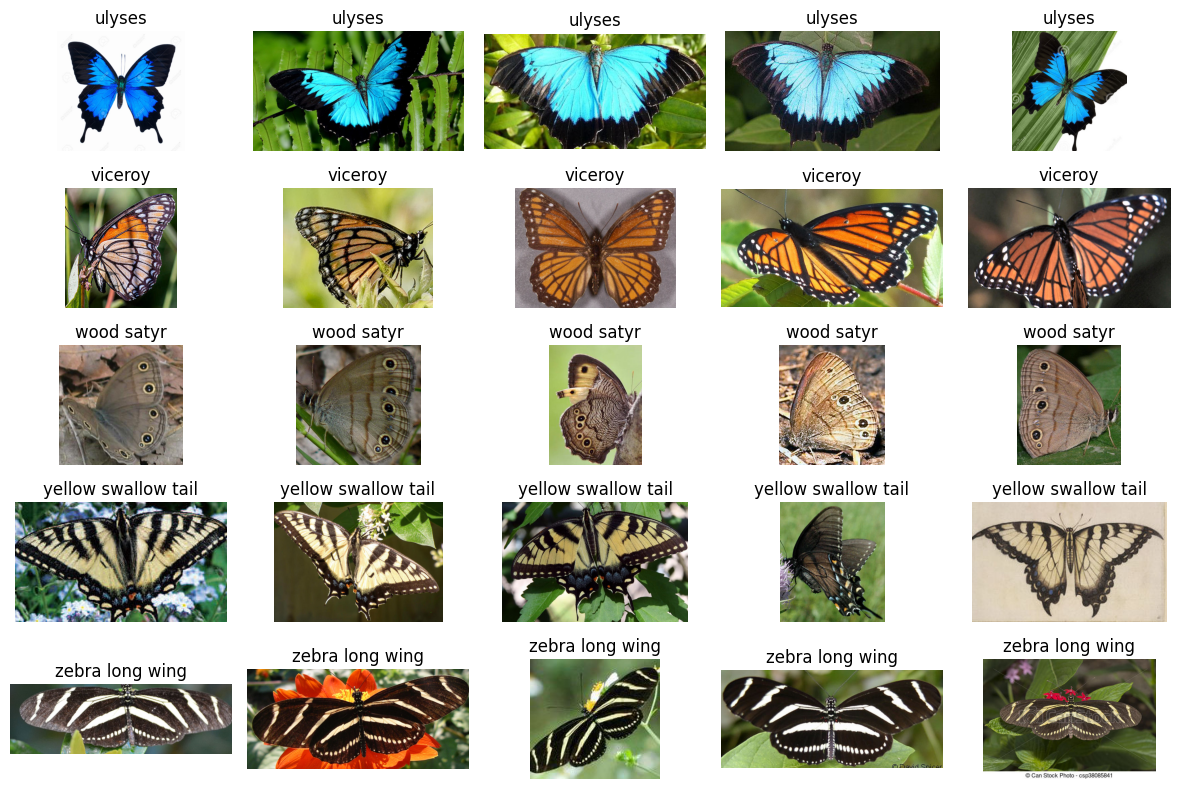

In [47]:
import matplotlib.pyplot as plt

# Display sample images from different classes
num_samples_per_class = 5  # Number of samples to display per class

plt.figure(figsize=(12, 8))

for i, label in enumerate(data['labels'].unique()):
    # Select images of the current class
    class_images = data[data['labels'] == label]['image_path'].head(num_samples_per_class).tolist()
    
    # Plot sample images
    for j, image_path in enumerate(class_images):
        plt.subplot(len(data['labels'].unique()), num_samples_per_class, i * num_samples_per_class + j + 1)
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')

plt.tight_layout()
plt.show()


## Checking the Distribution of Image Dimensions:

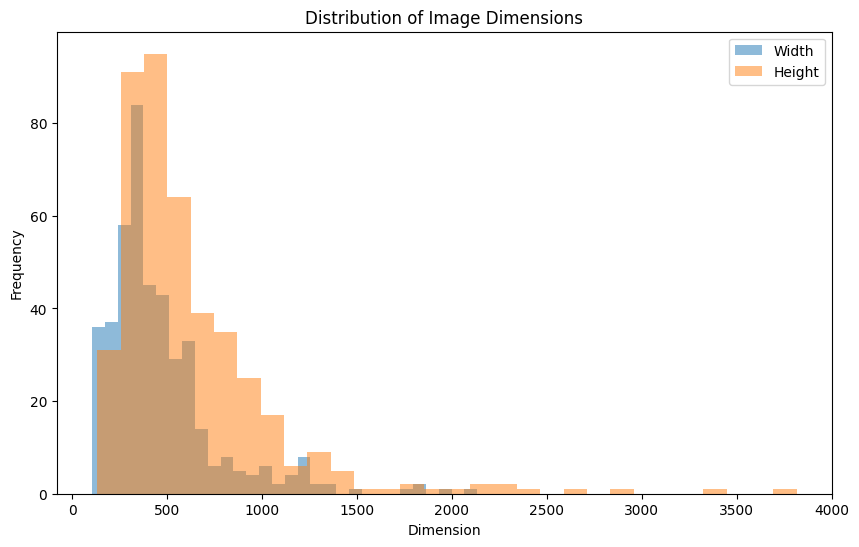

In [48]:
import numpy as np

# Calculate image dimensions (width and height)
image_dimensions = np.array([plt.imread(img_path).shape[:2] for img_path in data['image_path']])

# Plot histogram of image dimensions
plt.figure(figsize=(10, 6))
plt.hist(image_dimensions[:, 0], bins=30, alpha=0.5, label='Width')
plt.hist(image_dimensions[:, 1], bins=30, alpha=0.5, label='Height')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [5]:
import numpy as np
import cv2
import pandas as pd
import imageio

# Preprocess images
X = []
error_paths = []

for path in data['image_path']:
    try:
        if path.lower().endswith('.gif'):
            # Read GIF files
            gif = imageio.mimread(path)
            frames = [cv2.cvtColor(frame, cv2.COLOR_RGB2BGR) for frame in gif]
            # Select the first frame for simplicity
            image = frames[0]
        else:
            # Read other image formats
            image = cv2.imread(path)
            if image is None:
                raise Exception(f"Error loading image: {path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = cv2.resize(image, (256, 256))
        X.append(image)
    except Exception as e:
        print(f"Error processing image: {path}, {e}")
        error_paths.append(path)

if error_paths:
    print("Error: Unable to process the following images:")
    for path in error_paths:
        print(path)

X = np.array(X) / 255.0  # Normalize


In [17]:
import numpy as np
import cv2
import pandas as pd

# Preprocess images
X = []
y = []

for path, label in zip(df['image_path'], df['labels']):
    try:
        image = cv2.imread(path)
        if image is None:
            raise Exception(f"Error loading image: {path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = cv2.resize(image, (256, 256))
        X.append(image)
        y.append(label)
    except Exception as e:
        print(f"Error processing image: {path}, {e}")

# Convert to numpy array
X = np.array(X) / 255.0  # Normalize
y = np.array(y)

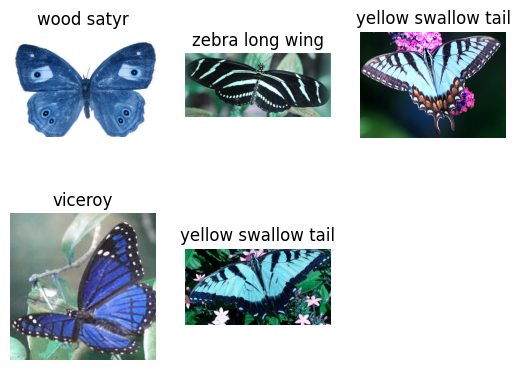

In [30]:
# Load images only if the index exists
if len(data) > 200:
    img1 = cv2.imread(data['image_path'][200])
    plt.subplot(2, 3, 1)
    plt.imshow(img1)
    plt.title(data['labels'][200])
    plt.axis('off')

if len(data) > 400:
    img2 = cv2.imread(data['image_path'][400])
    plt.subplot(2, 3, 2)
    plt.imshow(img2)
    plt.title(data['labels'][400])
    plt.axis('off')

if len(data) > 300:
    img3 = cv2.imread(data['image_path'][300])
    plt.subplot(2, 3, 3)
    plt.imshow(img3)
    plt.title(data['labels'][300])
    plt.axis('off')

if len(data) > 110:
    img4 = cv2.imread(data['image_path'][110])
    plt.subplot(2, 3, 4)
    plt.imshow(img4)
    plt.title(data['labels'][110])
    plt.axis('off')

if len(data) > 260:
    img5 = cv2.imread(data['image_path'][260])
    plt.subplot(2, 3, 5)
    plt.imshow(img5)
    plt.title(data['labels'][260])
    plt.axis('off')

if len(data) > 500:
    img6 = cv2.imread(data['image_path'][500])
    plt.subplot(2, 3, 6)
    plt.imshow(img6)
    plt.title(data['labels'][500])
    plt.axis('off')

plt.show()


In [19]:
# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [20]:
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 432
Length of y: 432


In [21]:
print("Unique labels in y:", np.unique(y))

Unique labels in y: ['ulyses' 'viceroy' 'wood satyr' 'yellow swallow tail' 'zebra long wing']


In [22]:
print(data.head())

                                          image_path  labels
0  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
1  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
2  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
3  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses
4  D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...  ulyses


In [23]:
print("Length of data DataFrame:", len(data))


Length of data DataFrame: 432


In [24]:
missing_paths = data[~data['image_path'].isin(error_paths)]['image_path']
print("Image paths not present in X:")
print(missing_paths)

Image paths not present in X:
0      D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...
1      D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...
2      D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...
3      D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...
4      D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\ulyses\0...
                             ...                        
427    D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...
428    D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...
429    D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...
430    D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...
431    D:\SEM 6\ML LAB\PROBLEMS\5. CNN\Train\zebra lo...
Name: image_path, Length: 432, dtype: object


In [25]:
# Check for duplicate image paths
duplicate_paths = data[data.duplicated(subset='image_path')]['image_path']
if not duplicate_paths.empty:
    print("Duplicate image paths found:")
    print(duplicate_paths)
else:
    print("No duplicate image paths found.")


No duplicate image paths found.


In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [27]:
# Build model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,458,961 (78.04 MB)

 Trainable params: 6,819,653 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,639,308 (52.03 MB)

In [28]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.2219 - loss: 2.1485 - val_accuracy: 0.2529 - val_loss: 1.5746
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2183 - loss: 1.5795 - val_accuracy: 0.2414 - val_loss: 1.5702
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2649 - loss: 1.5428 - val_accuracy: 0.4483 - val_loss: 1.3683
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3960 - loss: 1.3713 - val_accuracy: 0.6322 - val_loss: 1.0186
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5846 - loss: 1.1465 - val_accuracy: 0.7241 - val_loss: 0.8379
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6036 - loss: 1.0186 - val_accuracy: 0.8391 - val_loss: 0.7037
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6582 - loss: 0.8198 - val_accuracy: 0.8161 - val_loss: 0.6629
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7537 - loss: 0.7094 - val_accuracy: 0.9080 - val_loss:

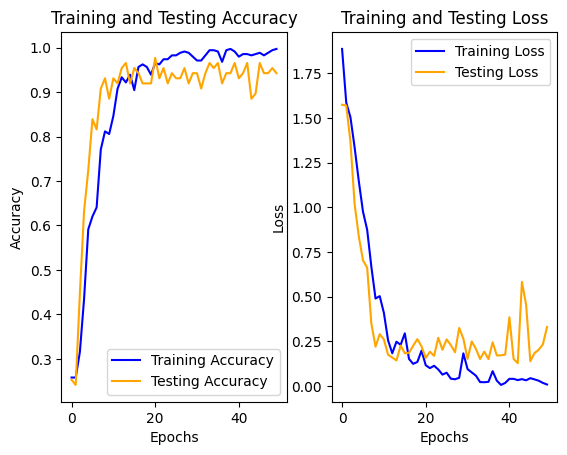

<Figure size 1200x600 with 0 Axes>

In [31]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [33]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if needed

# Generate classification report
class_names = ['ulyses', 'viceroy', 'wood satyr', 'yellow swallow tail', 'zebra long wing']  # Define class names if available
report = classification_report(y_test, y_pred_classes, target_names=class_names)

print(report)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.9400 - loss: 0.3324
Test Loss: 0.33065149188041687
Test Accuracy: 0.9425287246704102
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
                     precision    recall  f1-score   support

             ulyses       1.00      1.00      1.00        16
            viceroy       0.95      0.95      0.95        19
         wood satyr       1.00      0.93      0.96        14
yellow swallow tail       0.87      0.81      0.84        16
    zebra long wing       0.92      1.00      0.96        22

           accuracy                           0.94        87
          macro avg       0.95      0.94      0.94        87
       weighted avg       0.94      0.94      0.94        87

[[16  0  0  0  0]
 [ 0 18  0  1  0]
 [ 0  0 13  1  0]
 [ 0  1  0 13  2]
 [ 0  0  0  0 22]]


<Axes: >

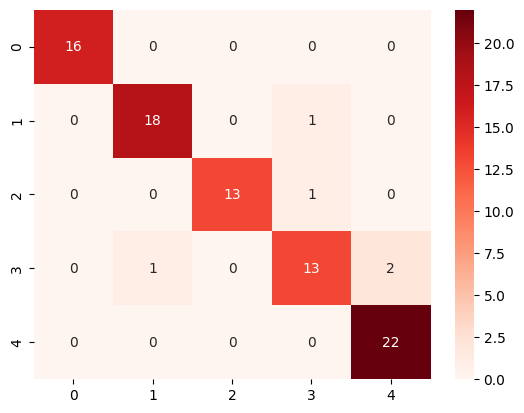

In [50]:
cm=confusion_matrix(y_test,y_pred_classes)
sns.heatmap(cm,annot=True,fmt='g',cmap='Reds')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step


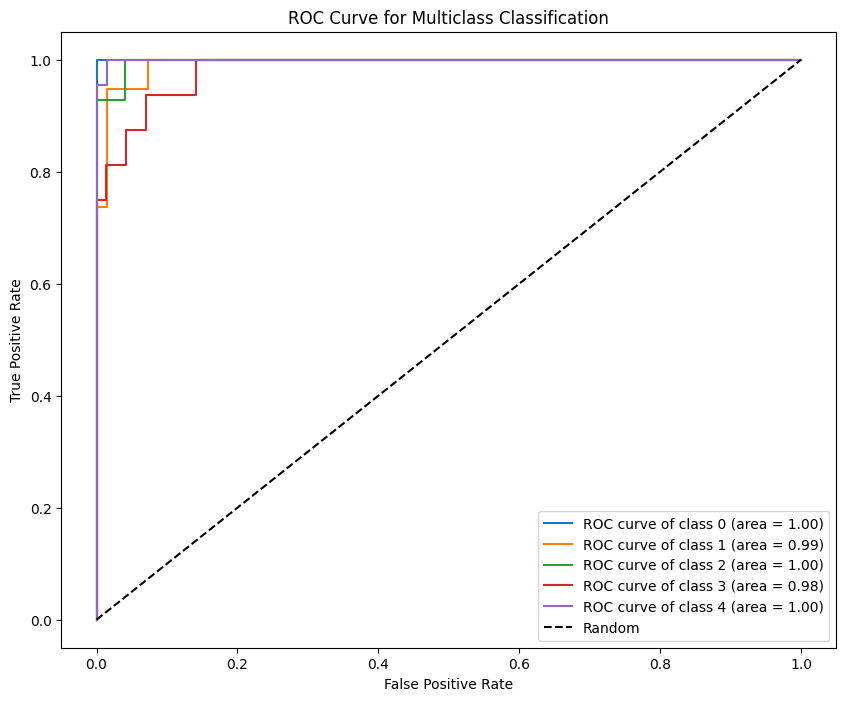

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC curve
y_prob = model.predict(X_test)
n_classes=5

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4,])  # n_classes is the number of classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()
